<a href="https://colab.research.google.com/github/shulc30/classification-of-pneumonia-by-X-ray-images/blob/main/tst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
from google.colab import files
from glob import glob
import time
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
path = '/content/drive/MyDrive/ DataForOCR'
img_width = 320
img_heigh = 320

In [15]:
imag = [] # Создаем пустой список изображений 

cur_time = time.time() # Засекаем текущее время
for filename in sorted(os.listdir(path + '/')): # Проходим по всем файлам    
    imag.append(image.load_img(os.path.join(path + '/',filename),
                                       target_size=(img_width, img_heigh)))                                                      
print ('Время загрузки: ', time.time() - cur_time, 'c', sep='') # Отображаем время загрузки 

Время загрузки: 0.19633078575134277c


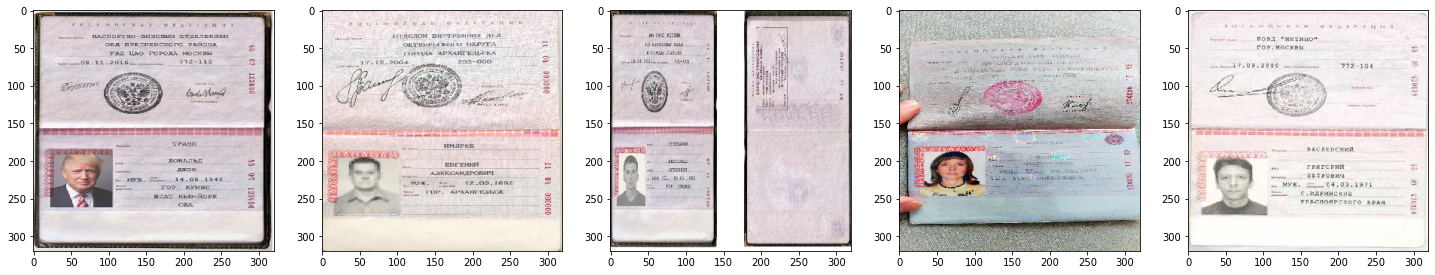

In [16]:
n = 5 # Количество выводимых случайных картинок
fig, axs = plt.subplots(1, n, figsize=(25, 5)) 
for i in range(n): # Выводим в цикле n случайных изображений
    img = random.choice(imag) # Выбираем случайное фото для отображения
    axs[i].imshow(img) # Отображаем фото
plt.show() #Показываем изображения

In [6]:
!pip install -q easyocr

     |████████████████████████████████| 2.9 MB 7.7 MB/s 
     |████████████████████████████████| 604 kB 67.8 MB/s 
     |████████████████████████████████| 145 kB 55.6 MB/s 
     |████████████████████████████████| 47.6 MB 1.7 MB/s 


In [7]:
import easyocr

In [8]:
reader = easyocr.Reader(['ru'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [10]:
result = reader.readtext('/content/drive/MyDrive/ DataForOCR/1.jpeg', detail=1) # если detail=1 возвращаются bounding box, текст и уверенность сети, 
                                            
result

[([[157, 85], [251, 85], [251, 99], [157, 99]],
  '€ Ии € к',
  0.36167572956628474),
 ([[255, 85], [287, 85], [287, 99], [255, 99]], '4 Я', 0.7301416281540118),
 ([[309, 87], [435, 87], [435, 103], [309, 103]],
  'Ф Е 4 ₽ ₽ А ц',
  0.5026293742651632),
 ([[439, 87], [473, 87], [473, 101], [439, 101]], 'И %', 0.5758757881260388),
 ([[153, 121], [181, 121], [181, 139], [153, 139]], 'мО', 0.7162021497104639),
 ([[191, 123], [303, 123], [303, 139], [191, 139]],
  'УФМС РОССИИ',
  0.6937717150071401),
 ([[145, 145], [345, 145], [345, 165], [145, 165]],
  'ПО МУРМАНСКОЙ ОБЛАСТИ',
  0.8742077821459595),
 ([[139, 175], [315, 175], [315, 195], [139, 195]],
  'В ГОРОДЕ МОНЧЕГОРСК',
  0.9878489759145177),
 ([[179, 201], [215, 201], [215, 219], [179, 219]],
  '2008',
  0.6380529183124702),
 ([[335, 205], [361, 205], [361, 219], [335, 219]], '123', 0.9999732957477904),
 ([[371, 205], [397, 205], [397, 219], [371, 219]], '005', 0.9994590510550797),
 ([[97, 269], [183, 269], [183, 311], [97, 311]], 

In [11]:
def plot_bb(box):
    box = np.array(box)
    x = np.append(box[:, 0], box[0, 0])
    y = np.append(box[:, 1], box[0, 1])
    plt.plot(x, y, lw=3.)

def show_results(img_name, result):
    plt.figure(figsize=(16, 6))
    boxes = []
    words = ''
    for prediction in result:
        boxes.append(prediction[0])
        words = words + prediction[1] + '\n'

    img = plt.imread(img_name)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    for box in boxes:
        plot_bb(box)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.text(0, 0.3, words, fontsize=14)
    plt.axis("off")
    plt.show()

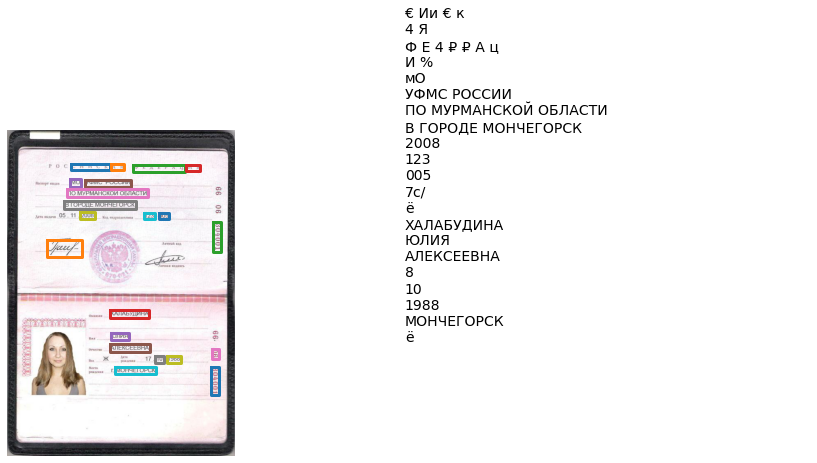

In [13]:
reader = easyocr.Reader(['ru'])
img_name = '/content/drive/MyDrive/ DataForOCR/1.jpeg'
result = reader.readtext(img_name, detail=1) 
show_results(img_name, result)

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/ DataForOCR/0.jpeg'

In [ ]:
reader = easyocr.Reader(['ru'])
result = reader.readtext(IMAGE_PATH)
result

[([[101, 31], [225, 31], [225, 45], [101, 45]],
  'С с и и с к ; я',
  0.4924764277035603),
 ([[271, 31], [313, 31], [313, 47], [271, 47]], '4 Е ₽', 0.7420792371110427),
 ([[109, 59], [365, 59], [365, 78], [109, 78]],
  'ПАСПОРТНО-визовым ОтДЕЛЕНИЕМ',
  0.4649013023168838),
 ([[133, 83], [163, 83], [163, 99], [133, 99]], 'овд', 0.9807082013073806),
 ([[168, 82], [280, 82], [280, 96], [168, 96]],
  'ПРЕСНЕНСКОГО',
  0.8290205578832405),
 ([[287, 81], [343, 81], [343, 97], [287, 97]], 'РАЙОНА', 0.9998541913128076),
 ([[139, 105], [335, 105], [335, 121], [139, 121]],
  'УВД ЦАО ГОРОДА МОСКВЫ',
  0.6845209667987794),
 ([[87, 129], [177, 129], [177, 145], [87, 145]],
  '09.11.2016',
  0.7230126896465396),
 ([[192, 133], [237, 133], [237, 145], [192, 145]],
  'аарачагыы',
  0.06287811191026842),
 ([[269, 127], [335, 127], [335, 143], [269, 143]],
  '772-112',
  0.7319472347606539),
 ([[399, 169], [415, 169], [415, 201], [399, 201]], '&', 0.41793873324715847),
 ([[278, 196], [363, 196], [363,

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

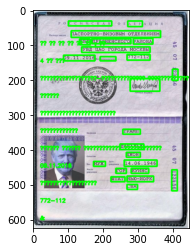

In [ ]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=50
    
plt.imshow(img)
plt.show()